<a href="https://colab.research.google.com/github/pachterlab/monod/blob/anndata/Monod_demo_new.ipynb?short_path=e568791" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Monod* on Colab

In the current notebook, we apply *Monod* to identify differentially regulated genes between GABAergic and glutamatergic cell types in a single Allen dataset. 

# Inference pipeline

## Install prerequisites

In [1]:
# # %%capture
# # !pip install -i https://test.pypi.org/simple/ -U --extra-index-url https://pypi.org/simple   monod  
# # !pip install -i https://pypi.org/simple/  monod  
# !pip install monod

Let's make sure that the version is correct.

In [2]:
!pip show monod

Name: monod
Version: 0.2.9.0
Summary: the Monod package fits CME models to sequencing data.
Home-page: https://github.com/pachterlab/monod
Author: Gennady Gorin, Lior Pachter
Author-email: ggorin@caltech.edu, lpachter@caltech.edu
License: 
Location: /home/cat/.conda/envs/myenv/lib/python3.12/site-packages
Requires: anndata, loompy, matplotlib, numdifftools, numpy, pytz, scikit-learn, scipy, tqdm
Required-by: 


## Import data

In [3]:
# ! git clone https://github.com/pachterlab/monod_examples.git

In [4]:
# !rm -r sample_data

In [5]:
# !mv monod_examples/* .

In [6]:
# !rm -r monod_examples

In [7]:
# !mv sample_data/* .

In [8]:
# !rmdir sample_data

In [9]:
# !cat allen_C01_gaba.tar.gz.* | tar xzvf -

In [10]:
# !mv home/ggorin/projects/monod_examples/sample_data/allen_C01_gaba.loom .

In [11]:
# !cat allen_C01_glu.tar.gz.* | tar xzvf -

In [12]:
# !mv home/ggorin/projects/monod_examples/sample_data/allen_C01_glu.loom .

In [13]:
# !rm -r  ./home

In [14]:
# !rm *.tar.*

## Import package components

In [1]:
# import monod
# from monod import preprocess, extract_data, cme_toolbox, inference, analysis

import matplotlib.pyplot as plt
import numpy as np
import anndata

In [2]:
import logging, sys
logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.INFO)
import warnings
warnings.filterwarnings("ignore") #warning suppression within script is not respected by colab
warnings.simplefilter('ignore')

In [38]:
# execfile("src/monod/preprocess.py")
import sys

sys.path.insert(0, '/home/cat/monod/src/monod')

import extract_data, cme_toolbox, inference, analysis, mminference
import importlib

importlib.reload(extract_data)
importlib.reload(inference)
importlib.reload(cme_toolbox)
importlib.reload(analysis)
importlib.reload(mminference)

<module 'mminference' from '/home/cat/monod/src/monod/mminference.py'>

## Set up model and perform inference.

In [5]:
# Define model.
fitmodel = cme_toolbox.CMEModel('Bursty','Poisson')
transcriptome_filepath = './monod_examples/polyA_ref/gg_200524_mouse_genome_polyA_cum_1'

demo_genes = ['Eif5b','Xrcc5',	'Klhl12','Rgs7','Thsd7b']
all_DE = ['Rcan3', 'Rspo3', 'Vrk1', 'Tcerg1l', 'Clic4', 'Hcrtr2', '1110004F10Rik', 'Erbin', 'Lrp12', 'Gatm', 'Rims3']

# Perform inference. (don't need to give these bounds, here for debugging but can use defaults.)
lb = [-1.0, -1.8, -1.8 ]
ub = [4.2, 2.5, 3.5]
# samp_lb, samp_ub = [-8, -3],[-5, 0]
# grid = [6,7]

## Fix sampling parameters to the ones given in the other Monod example.
samp_lb, samp_ub = [-6.8, -1.5],[-6.9, -1.6]
grid = [1,1]

gaba_adata = anndata.read_h5ad('./gaba_example.h5ad')
gaba_adata.var_names_make_unique()

# TODO: make 'nascent', 'mature' automatically recognized.
# './gaba_example.h5ad'
mek_means_params = (4,2) # Set to none if not using meK-Means

# TODO: fix number of genes selected (no longer getting to total every time).
gaba_adata = inference.perform_inference(gaba_adata, fitmodel, n_genes=5, seed=5, genes_to_fit=demo_genes,
            phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, 
            gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1}, 
                                         transcriptome_filepath=transcriptome_filepath, poisson_average_log_length=5, dataset_string='new_gaba', viz=False,
                                         num_cores=1, mek_means_params=mek_means_params) 

The expected modalities for this model are: ['unspliced', 'spliced']
If your anndata layers have different names, please give a modality dictionary of the form: modality_name_dict  = {'spliced':your_spliced_layer_name, 'unspliced':your_unspliced_layer_name} 
INFO:root:Directory new_gaba already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: new_gaba
is sparse
INFO:root:Added lengths
INFO:root:728 cells detected.
3578 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 5 genes selected.
['unspliced', 'spliced'] previous ordering
['unspliced', 'spliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: unspliced, spliced
['unspliced', 'spliced']
INFO:root:Search data created.
INFO:root:Directory new_gaba/Bursty_Poisson_1x1 already exists.
INFO:root:Global inference parameters stored to new_gaba/Bursty_Poisson_1x1/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid

/home/cat/monod/src/monod/inference.py:171: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var["cluster_{}_param_".format(j) + param_name] = param_values


INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Standard error of the MLE computation complete. Runtime: 0.8 seconds.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Standard error of the MLE computation complete. Runtime: 1.4 seconds.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Standard error of the MLE computation complete. Runtime: 1.1 seconds.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 2 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Standard error of the MLE computation complete. Runtime: 0.6 seconds.
INFO:root:Uncertainties per gene calculated.


/home/cat/monod/src/monod/mminference.py:2140: RuntimeWarning: invalid value encountered in sqrt
  hess_inv = np.linalg.inv(hess[gene_index, :, :])


INFO:root:Directory glu_example already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: glu_example
INFO:root:Duplicate variable names found. Making them unique...
is sparse
INFO:root:Added lengths


/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


INFO:root:6629 cells detected.
5520 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 5 genes selected.
['unspliced', 'spliced'] previous ordering
['unspliced', 'spliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: unspliced, spliced
['unspliced', 'spliced']
INFO:root:Search data created.
INFO:root:Directory glu_example/Bursty_Poisson_1x1 already exists.
ERROR:root:Global inference parameters could not be stored to glu_example/Bursty_Poisson_1x1/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid scan.
INFO:root:M Step Initial Run: 
INFO:root:EM Epoch 1/2: 
mstep self.weights:  [0.25288529 0.2196231  0.27491167 0.25257994]
Q Function:  -113338.3265942548

INFO:root:EM Epoch 2/2: 
mstep self.weights:  [0.28002378 0.2572466  0.02444389 0.43828573]
Q Function:  -113601.41920510988

INFO:root:Non-parallelized grid scan complete.
INFO:root:Directory glu_example/Bursty_Poisson

/home/cat/monod/src/monod/inference.py:171: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var["cluster_{}_param_".format(j) + param_name] = param_values


INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Standard error of the MLE computation complete. Runtime: 1.3 seconds.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Standard error of the MLE computation complete. Runtime: 1.2 seconds.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Standard error of the MLE computation complete. Runtime: 0.7 seconds.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Standard error of the MLE computation complete. Runtime: 1.8 seconds.
INFO:root:Uncertainties per gene calculated.


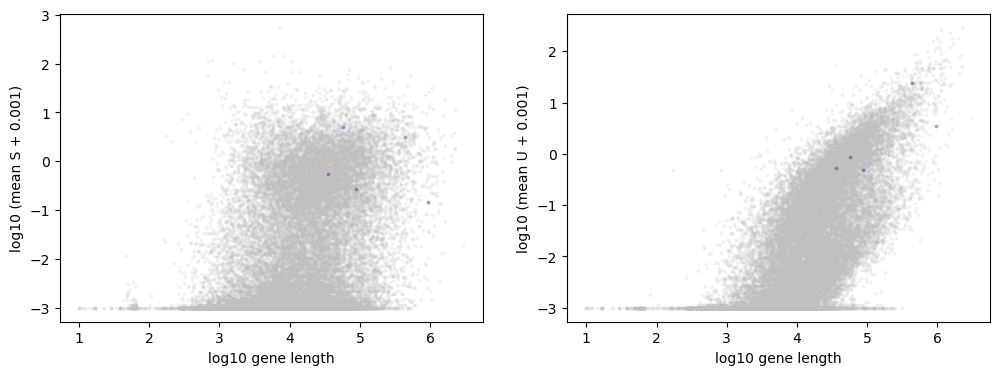

In [8]:
# Fix the genes to be the same as for the gaba data.
genes_to_fit = [i for i in gaba_adata.var_names]
n_genes = len(genes_to_fit)

glu_adata = inference.perform_inference('./glu_example.h5ad', fitmodel, n_genes=n_genes, seed=4, genes_to_fit=genes_to_fit,
                                       phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, 
                                        gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1},
                                       transcriptome_filepath=transcriptome_filepath, mek_means_params=mek_means_params) #['Eif5b', 'Thsd7b', 'Fbxw2', 'Otud7a', 'Asah1'])glu_adata = inference.perform_inference('./glu_example.h5ad', fitmodel, n_genes=5, seed=4, genes_to_fit=DE_genes,

In [20]:
# # NB currently can't save whole object to file since some .uns attributes cannot be pickled.
# gaba_adata.write('gaba_fit.h5ad')
# gaba_adata.write('glu_fit.h5ad')

## Access gene info.

In [9]:
# AIC.
display(gaba_adata.var[['AIC']])

# Optimum biological parameters.
display(gaba_adata.var[[i for i in gaba_adata.var.keys() if 'param' in i]])

# Uncertainties from Hessian.
display(gaba_adata.var[[i for i in gaba_adata.var.keys() if 'sigma' in i]])

,AIC
gene_name,
Eif5b,4969.559760
Xrcc5,2381.881611
Klhl12,2418.301015
Rgs7,8092.472083
Thsd7b,3908.289423


,cluster_0_param_$\log_{10} b$,cluster_1_param_$\log_{10} b$,cluster_2_param_$\log_{10} b$,cluster_3_param_$\log_{10} b$,cluster_0_param_$\log_{10} \beta$,cluster_1_param_$\log_{10} \beta$,cluster_2_param_$\log_{10} \beta$,cluster_3_param_$\log_{10} \beta$,cluster_0_param_$\log_{10} \gamma$,cluster_1_param_$\log_{10} \gamma$,cluster_2_param_$\log_{10} \gamma$,cluster_3_param_$\log_{10} \gamma$
gene_name,,,,,,,,,,,,
Eif5b,1.567979,1.709565,1.420600,1.799266,-0.365503,-0.350278,-0.357130,-0.059781,-0.369685,-0.431575,-0.566865,-0.058104
Xrcc5,1.010616,1.302207,2.084836,1.671530,2.167031,-0.737198,0.121089,0.701880,1.801825,-0.083097,0.978687,1.480083
Klhl12,0.674554,1.868176,0.465916,-1.000000,-1.612751,-0.254174,-1.536133,0.116509,-0.668881,0.631138,-0.739028,1.281040
Rgs7,1.948527,2.474719,2.152483,1.794641,-0.436760,-0.186330,-0.227519,-0.410946,0.320360,0.491983,0.426476,0.278018
Thsd7b,1.965223,1.562176,3.267050,1.386829,0.152258,-0.055437,2.322944,0.081113,1.146999,0.690292,3.411785,0.999605


,cluster_0_sigma_$\log_{10} b$,cluster_0_sigma_$\log_{10} \beta$,cluster_0_sigma_$\log_{10} \gamma$,cluster_1_sigma_$\log_{10} b$,cluster_1_sigma_$\log_{10} \beta$,cluster_1_sigma_$\log_{10} \gamma$,cluster_2_sigma_$\log_{10} b$,cluster_2_sigma_$\log_{10} \beta$,cluster_2_sigma_$\log_{10} \gamma$,cluster_3_sigma_$\log_{10} b$,cluster_3_sigma_$\log_{10} \beta$,cluster_3_sigma_$\log_{10} \gamma$
gene_name,,,,,,,,,,,,
Eif5b,0.119813,0.118118,0.119336,0.075120,0.075285,0.074688,0.134915,0.135447,0.134208,0.088128,0.084036,0.087378
Xrcc5,1.690776,1.891493,1.701812,0.130197,0.127636,0.131926,0.095565,0.081335,0.104840,0.220292,0.191950,0.256510
Klhl12,0.460034,0.458846,0.461561,0.111354,0.106381,0.114617,0.629398,0.628061,0.630789,0.111592,0.099143,0.136933
Rgs7,0.067758,0.061108,0.072813,0.042509,0.037081,0.042328,0.060987,0.053338,0.063721,0.060679,0.055988,0.066743
Thsd7b,0.070182,0.051788,0.101903,0.050575,0.043162,0.072990,0.369290,0.243669,0.320749,0.077268,0.064599,0.137103


In [10]:
# AIC.
display(glu_adata.var[['AIC']])

# Optimum biological parameters.
display(glu_adata.var[[i for i in glu_adata.var.keys() if 'param' in i]])

# Uncertainties from Hessian.
display(glu_adata.var[[i for i in glu_adata.var.keys() if 'sigma' in i]])

,AIC
gene_name,
Eif5b,49857.411552
Xrcc5,20148.521348
Klhl12,21186.010134
Rgs7,80981.945756
Thsd7b,29602.460586


,cluster_0_param_$\log_{10} b$,cluster_1_param_$\log_{10} b$,cluster_2_param_$\log_{10} b$,cluster_3_param_$\log_{10} b$,cluster_0_param_$\log_{10} \beta$,cluster_1_param_$\log_{10} \beta$,cluster_2_param_$\log_{10} \beta$,cluster_3_param_$\log_{10} \beta$,cluster_0_param_$\log_{10} \gamma$,cluster_1_param_$\log_{10} \gamma$,cluster_2_param_$\log_{10} \gamma$,cluster_3_param_$\log_{10} \gamma$
gene_name,,,,,,,,,,,,
Eif5b,1.693350,1.632380,1.697104,1.695712,-0.154302,-0.305651,-0.298774,-0.361132,-0.428740,-0.540721,-0.536176,-0.581695
Xrcc5,0.770588,1.069279,1.065671,1.492431,-0.173915,-0.520106,-1.458276,-0.165390,0.197312,0.084446,-0.492151,0.468608
Klhl12,1.275481,2.475754,1.276451,0.418641,-0.630846,2.324929,-0.738872,-1.800000,0.070023,3.500000,-0.182428,-1.051627
Rgs7,2.047542,2.084515,2.306992,2.275037,-0.467517,-0.403761,-0.417630,-0.324145,0.076919,0.145071,0.317737,0.228767
Thsd7b,3.052513,1.591870,1.647377,1.624460,2.500000,0.182948,0.264572,0.076960,3.466164,0.877209,1.134217,0.797739


,cluster_0_sigma_$\log_{10} b$,cluster_0_sigma_$\log_{10} \beta$,cluster_0_sigma_$\log_{10} \gamma$,cluster_1_sigma_$\log_{10} b$,cluster_1_sigma_$\log_{10} \beta$,cluster_1_sigma_$\log_{10} \gamma$,cluster_2_sigma_$\log_{10} b$,cluster_2_sigma_$\log_{10} \beta$,cluster_2_sigma_$\log_{10} \gamma$,cluster_3_sigma_$\log_{10} b$,cluster_3_sigma_$\log_{10} \beta$,cluster_3_sigma_$\log_{10} \gamma$
gene_name,,,,,,,,,,,,
Eif5b,0.026837,0.026984,0.026563,0.027735,0.027689,0.027553,0.266829,0.263044,0.265412,0.021705,0.021562,0.021589
Xrcc5,0.158003,0.155903,0.158719,0.081920,0.081048,0.082948,0.479165,0.474528,0.485876,0.036905,0.035590,0.038814
Klhl12,0.083848,0.083076,0.084453,0.325401,0.157831,0.274955,0.609521,0.601580,0.604855,0.120031,0.119822,0.120244
Rgs7,0.016758,0.015637,0.017299,0.016179,0.014916,0.016724,0.195931,0.148018,0.196901,0.012851,0.011660,0.013031
Thsd7b,0.169173,0.055523,0.120436,0.021640,0.017005,0.030857,0.300465,0.205697,0.395996,0.016399,0.013198,0.023144


## Plot parameter distributions.

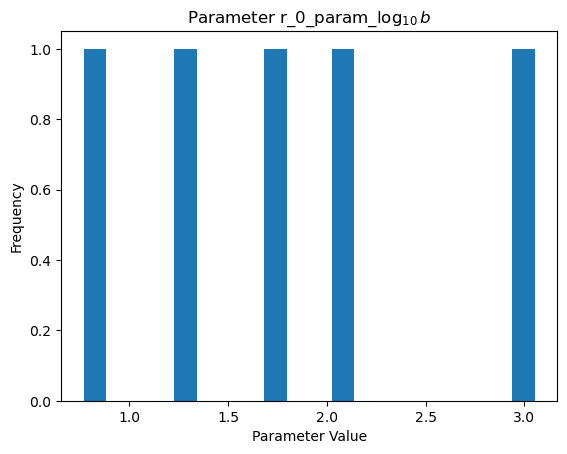

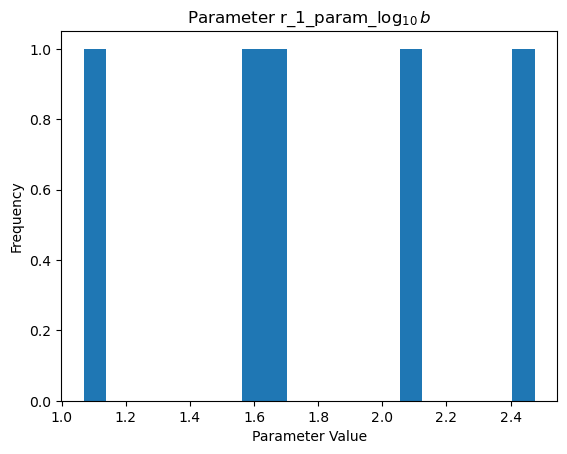

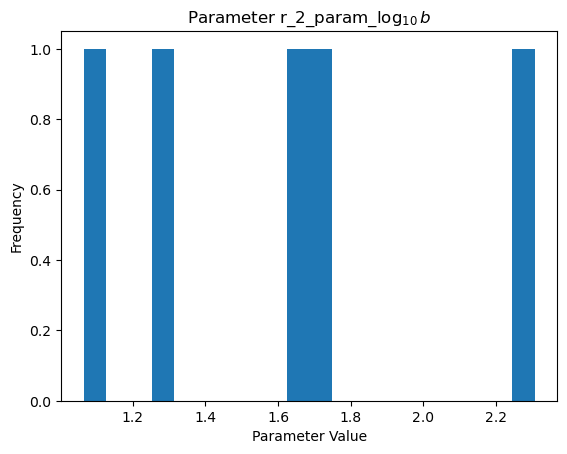

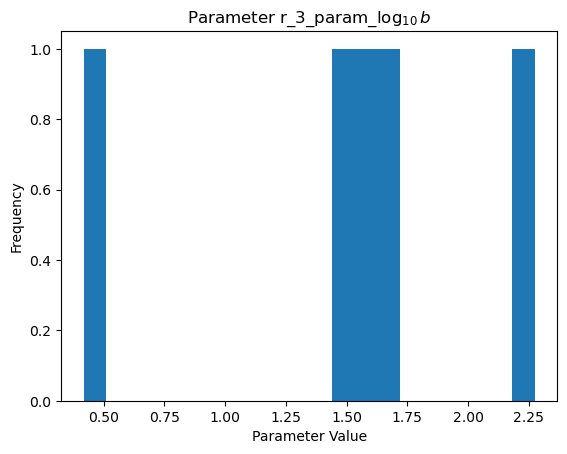

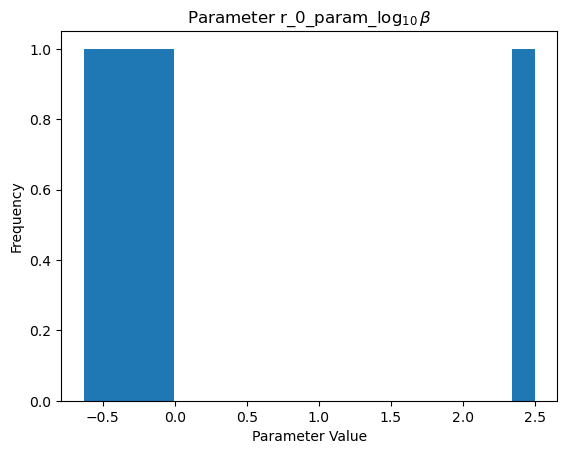

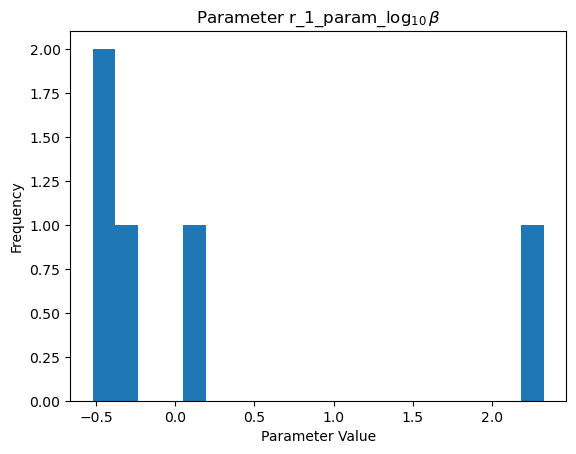

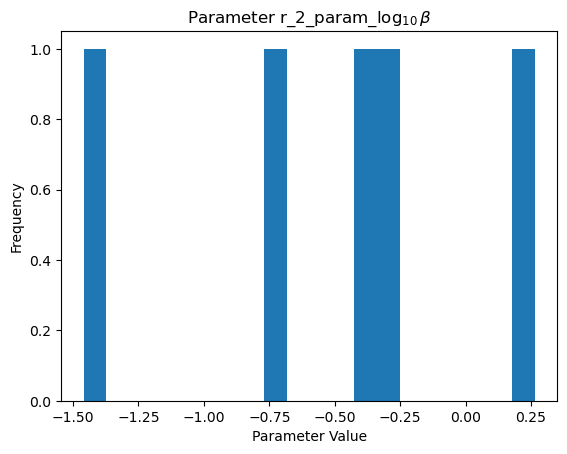

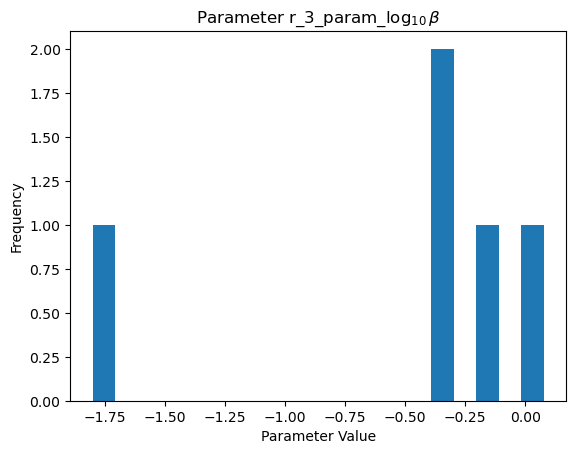

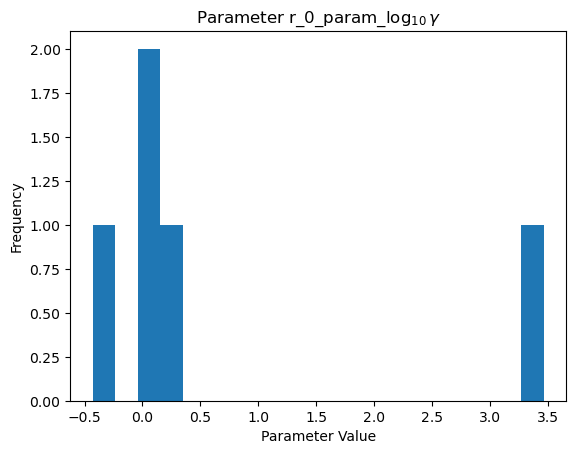

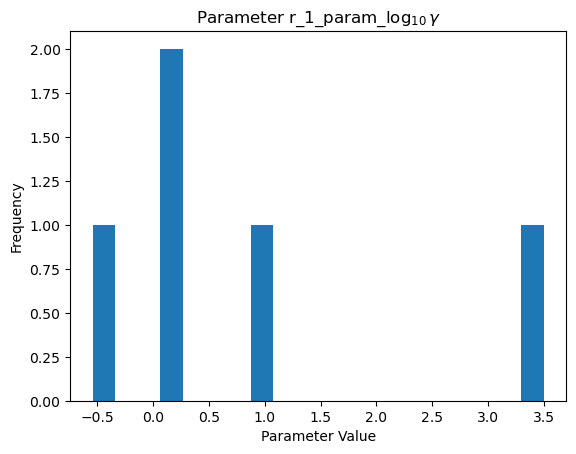

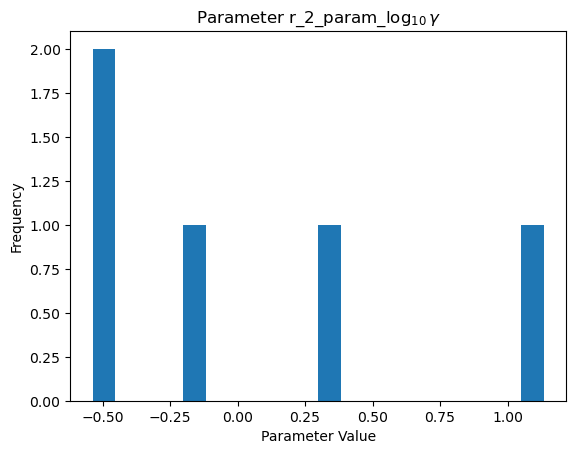

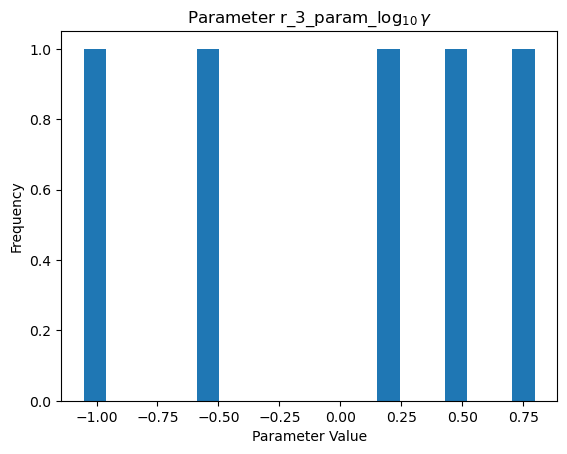

In [11]:
param_names = [i for i in glu_adata.var.keys() if 'param' in i]
for name in param_names:
    plt.hist(glu_adata.var[name], bins=20)
    plt.title('Parameter ' + name[6:])
    plt.xlabel('Parameter Value')
    plt.ylabel('Frequency')
    # plt.savefig(search_result.inference_string + '/parameter_dist_'+ str(i))#'/parameter_dist_{}'.format(
    plt.show()

In [12]:
# param_names = [i for i in gaba_adata.var.keys() if 'param' in i]
# for name in param_names:
#     plt.hist(gaba_adata.var[name], bins=20)
#     plt.title('Parameter ' + name[6:])
#     plt.xlabel('Parameter Value')
#     plt.ylabel('Frequency')
#     # plt.savefig(search_result.inference_string + '/parameter_dist_'+ str(i))#'/parameter_dist_{}'.format(
#     plt.show()
#     # print(gaba_adata.var[name] - glu_adata.var[name])

## Plot parameter values against gene length.

# Analysis (to be implemented)

## Reject genes.

In [39]:
# # Add rejection filter to adata.
gaba_adata = inference.reject_genes(gaba_adata, reject_at_bounds=False, mek_means=True, save_csq=True)#, threshold=-1, use_hellinger=False, reject_at_bounds=False)
glu_adata = inference.reject_genes(glu_adata, reject_at_bounds=False, mek_means=True, save_csq=True)#, threshold=-1, use_hellinger=False, reject_at_bounds=False)

# Show rejected genes.
display(glu_adata.var[[i for i in glu_adata.var.keys() if 'rejected' in i]])
display(gaba_adata.var[[i for i in gaba_adata.var.keys() if 'rejected' in i]])

# Show chi-squared values, and other rejection statistics if saved.
display(glu_adata.var[[i for i in glu_adata.var.keys() if 'csq' in i or 'pval' in i or 'hellinger' in i]])
display(gaba_adata.var[[i for i in gaba_adata.var.keys() if 'csq' in i or 'pval' in i or 'hellinger' in i]])

# # # Save chi-square values.
# chi_squareds_glu,  chi_squareds_gaba = glu_adata.var['csq'], gaba_adata.var['csq']

INFO:root:Chi-square computation complete. Rejected 3 genes out of 5. Runtime: 0.0 seconds.
INFO:root:Chi-square computation complete. Rejected 4 genes out of 5. Runtime: 0.0 seconds.
INFO:root:Chi-square computation complete. Rejected 2 genes out of 5. Runtime: 0.0 seconds.
INFO:root:Chi-square computation complete. Rejected 2 genes out of 5. Runtime: 0.0 seconds.
INFO:root:Chi-square computation complete. Rejected 1 genes out of 5. Runtime: 0.0 seconds.
INFO:root:Chi-square computation complete. Rejected 1 genes out of 5. Runtime: 0.0 seconds.
INFO:root:Chi-square computation complete. Rejected 0 genes out of 5. Runtime: 0.0 seconds.
INFO:root:Chi-square computation complete. Rejected 3 genes out of 5. Runtime: 0.0 seconds.


,0_rejected_genes,1_rejected_genes,2_rejected_genes,3_rejected_genes
gene_name,,,,
Eif5b,False,False,False,False
Xrcc5,False,False,False,False
Klhl12,False,False,False,True
Rgs7,True,True,False,True
Thsd7b,False,False,False,True


,0_rejected_genes,1_rejected_genes,2_rejected_genes,3_rejected_genes
gene_name,,,,
Eif5b,False,True,False,True
Xrcc5,False,True,True,False
Klhl12,True,False,False,False
Rgs7,True,True,True,True
Thsd7b,True,True,False,False


,0_csq,1_csq,2_csq,3_csq
gene_name,,,,
Eif5b,78.515135,5.373644e+01,0.188654,156.805446
Xrcc5,7.938545,4.184524e+01,0.000000,102.843128
Klhl12,81.890414,2.656669e-29,2.385356,975.653310
Rgs7,485.962478,4.226337e+02,0.000000,708.992284
Thsd7b,7.683852,4.315455e+02,0.300851,842.897960


,0_csq,1_csq,2_csq,3_csq
gene_name,,,,
Eif5b,8.027387,53.057719,1.556309e+01,30.713000
Xrcc5,0.000000,68.925367,1.878958e+01,0.002294
Klhl12,56.139345,7.432599,1.041083e+01,0.000000
Rgs7,70.399084,269.359184,1.446000e+02,45.807195
Thsd7b,77.798920,59.891496,5.495194e-30,7.249664


## Execute differential expression analysis.

In [40]:
# If 2 anndata objects are given, parameters are compared across datasets.
DE_genes, DE_filter, offs, residuals = analysis.DE_parameters(glu_adata, gaba_adata, viz=True, use_sigma=True)#, pval_thr=0.1)

# If 1 anndata object is given, parameters are compared across clusters (requires meK-Means)
# for i in (DE_genes):
#     print([j for j in i.index])

# FCs, p_values = analysis.DE(adata)

/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/home/cat/.conda/envs/myenv/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: 'search_result'

In [27]:
# # NB changing loom to h5ad.
# adata_gaba = anndata.read_loom('monod_examples/sample_data/allen_C01_gaba.loom')
# adata_gaba.var_names = adata_gaba.var['gene_name']
# adata_gaba.obs_names = adata_gaba.obs['barcode']
# adata_gaba.obs = adata_gaba.obs.drop(columns=['barcode'])
# adata_gaba.var = adata_gaba.var.drop(columns=['gene_name'])
# adata_gaba.write('gaba_example.h5ad')

### Show some gene distributions.

[0 1 2]
Eif5b
Xrcc5
Klhl12


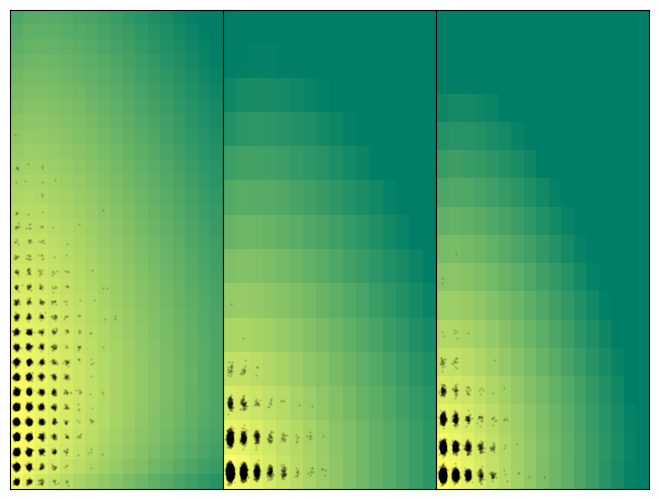

In [29]:
fitted_adata = glu_adata

search_result, search_data = fitted_adata.uns['search_result'], fitted_adata.uns['search_data']
logscale = True

sz =(1,3)
(nrows, ncols) = sz
fig1, ax1 = plt.subplots(nrows=nrows, ncols=ncols)

nax = np.prod(sz)

genes_to_plot = np.arange(nax)

genes_to_plot = np.asarray(genes_to_plot)
if genes_to_plot.dtype == bool:
    gtp_temp = np.arange(self.n_genes)
    genes_to_plot = gtp_temp[genes_to_plot]

number_of_genes_to_plot = len(genes_to_plot)
if number_of_genes_to_plot > 5:
    number_of_genes_to_plot = 5
    genes_to_plot = genes_to_plot[: 5]
if number_of_genes_to_plot > nax:  # This should no longer break...
    number_of_genes_to_plot = nax
    genes_to_plot = genes_to_plot[:nax]

j_ = 0
marg = 'joint'
modalities = ['spliced', 'unspliced']

print(genes_to_plot)
for i_ in genes_to_plot:
    lm = np.copy(search_data.M[:, i_])
    
    # TODO: generalize by adding attribute names as attribute of e.g. CMEModel
    # attributes = ['unspliced', 'spliced', 'protein']
    
    num_modalities = 2
    for i in range(num_modalities):
        if marg == modalities[i]:
            lm[:i] = 1
            lm[i+1:]=1
            
    axloc = np.unravel_index(j_, sz) if (sz[0] > 1 and sz[1] > 1) else j_

    samp = search_result.regressor_optimum[i_]
    Pa = np.squeeze(search_result.model.eval_model_pss(search_result.phys_optimum[i_], lm, samp))
    layers = np.array([i.copy() for i in search_data.layers])
    
    marg = 'joint'
    if marg == "joint":
        if logscale:
            Pa[Pa < 1e-10] = 1e-10
            Pa = np.log10(Pa)

        if num_modalities==2:
            ax1[axloc].imshow(Pa.T, aspect="auto", cmap="summer")
        elif num_modalities==3:
            ax1[axloc].imshow(Pa.sum(axis=2).T, aspect="auto", cmap="summer")
        else:
            log.error('Joint distribution plot only implemented for 2 or 3 modalities')
            
        ax1[axloc].invert_yaxis()

        jitter_magn = 0.1
        jitter = np.random.randn(2, search_result.n_cells) * jitter_magn
        ax1[axloc].scatter(
            *layers[:2, :,i_] + jitter, c="k", s=1, alpha=0.1
        )

        ax1[axloc].set_xlim([-0.5, search_data.M[0, i_] - 1.5])
        ax1[axloc].set_ylim([-0.5, search_data.M[1, i_] - 1.5])
    else:
        plot_hist_and_fit(ax1[axloc], search_data, i_, Pa, marg)
        if logscale:
            ax1[axloc].set_yscale("log")

    print(search_result.gene_names[i_])
    # if title:
    #     titlestr = search_result.gene_names[i_]
    #     if hasattr(search_result, "rejected_genes") and search_result.rejected_genes[i_]:
    #         titlestr += " (rej.)"
    #     ax1[axloc].set_title(titlestr, fontdict={"fontsize": 9})
    ax1[axloc].set_xticks([])
    ax1[axloc].set_yticks([])
    j_ += 1
fig1.tight_layout(pad=0.02)


/home/cat/monod/src/monod/inference.py:1302: RuntimeWarning: divide by zero encountered in divide
  dx = (np.asarray(self.sp.samp_ub) - np.asarray(self.sp.samp_lb)) / (
/home/cat/monod/src/monod/inference.py:1312: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  lnd = ax.imshow(


INFO:root:Figure stored to new_gaba/Bursty_Poisson_1x1/analysis_figures/kldiv.png.
[0 1 2 3 4]
INFO:root:Figure stored to new_gaba/Bursty_Poisson_1x1/analysis_figures/gene_distributions_joint.png.
INFO:root:P-value threshold: 0.05, Adjusted P-value threshold:0.05, Hellinger Threshold:0.05
INFO:root:Chi-square computation complete. Rejected 2 genes out of 5. Runtime: 0.1 seconds.
INFO:root:Figure stored to new_gaba/Bursty_Poisson_1x1/analysis_figures/subsampling.png.
INFO:root:Figure stored to new_gaba/Bursty_Poisson_1x1/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.80, -1.50.
INFO:root:P-value threshold: 0.05, Adjusted P-value threshold:0.05, Hellinger Threshold:0.05
INFO:root:Chi-square computation complete. Rejected 2 genes out of 5. Runtime: 0.1 seconds.
INFO:root:New optimum: -6.80, -1.50.
INFO:root:P-value threshold: 0.05, Adjusted P-value threshold:0.05, Hellinger Threshold:0.05
INFO:root:Chi-square computation complete. Rejected 2 genes out of 5. Run

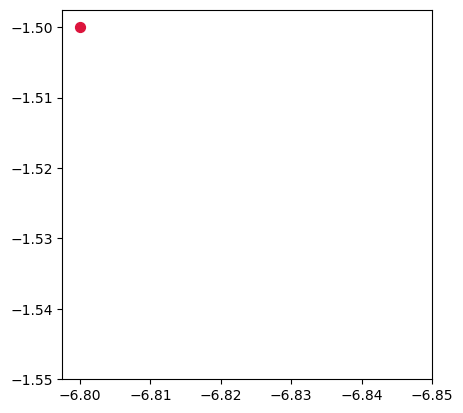

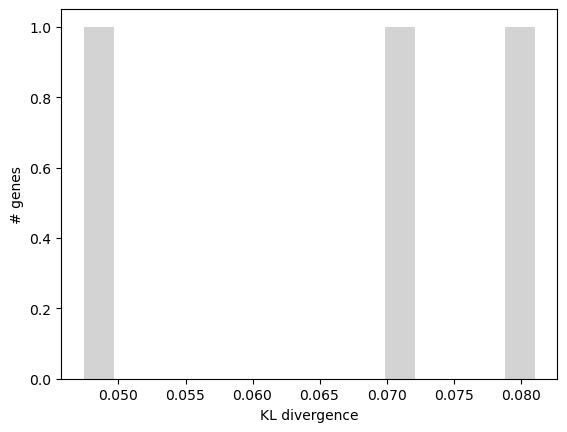

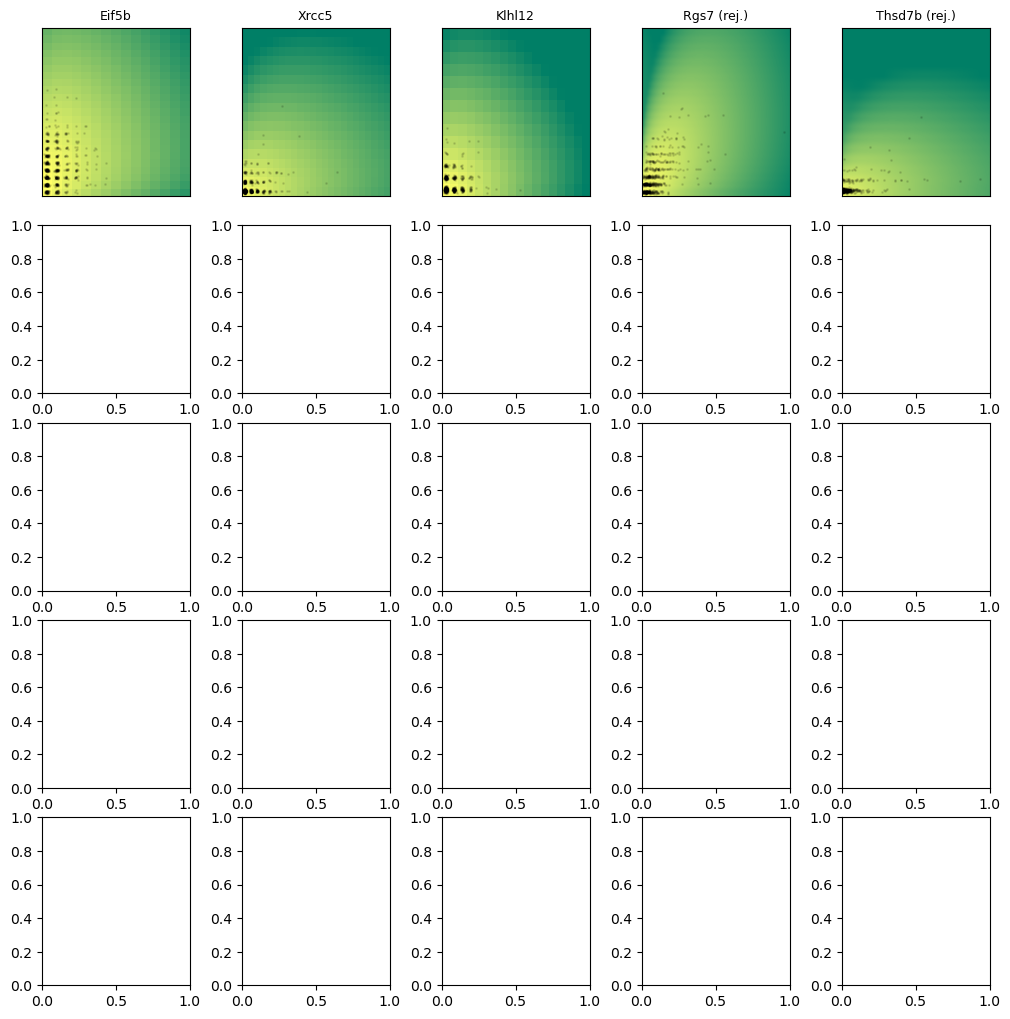

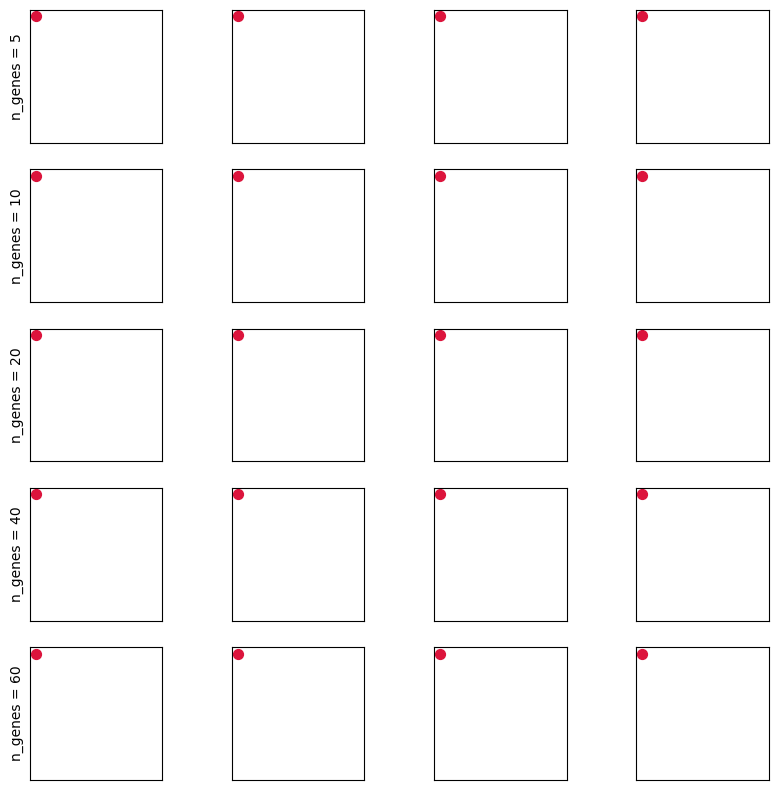

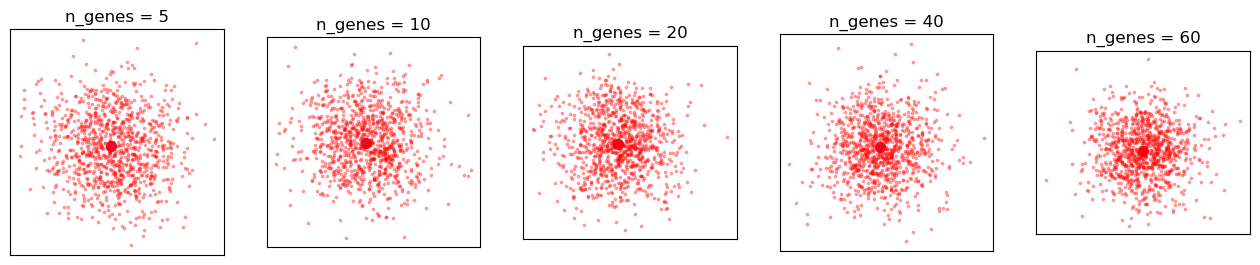

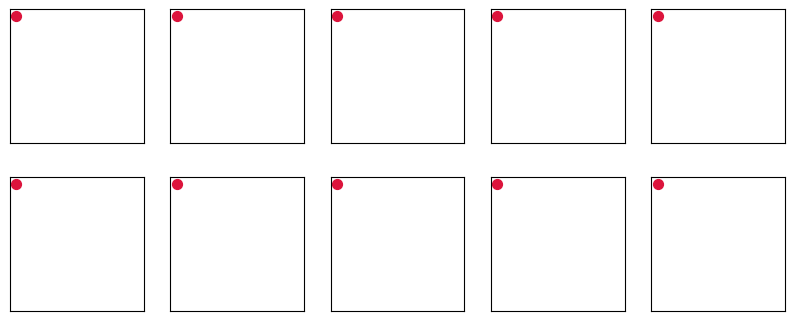

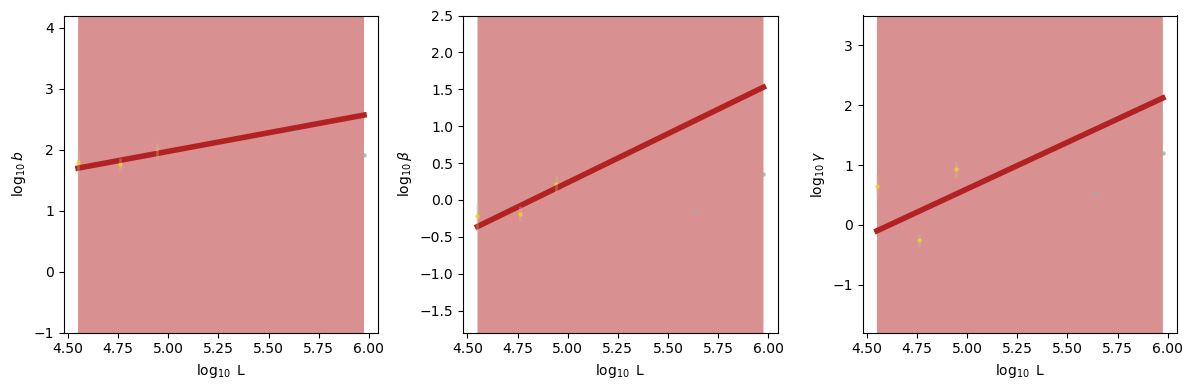

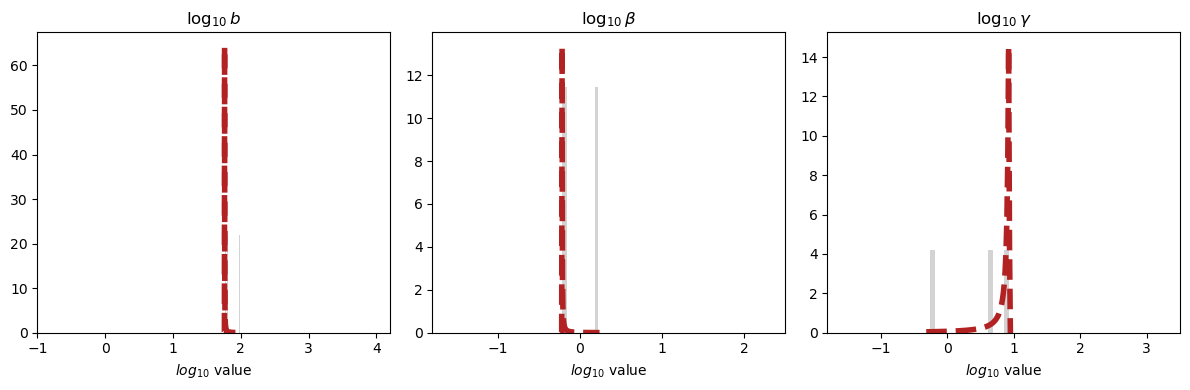

In [30]:
analysis.run_qc(gaba_adata)